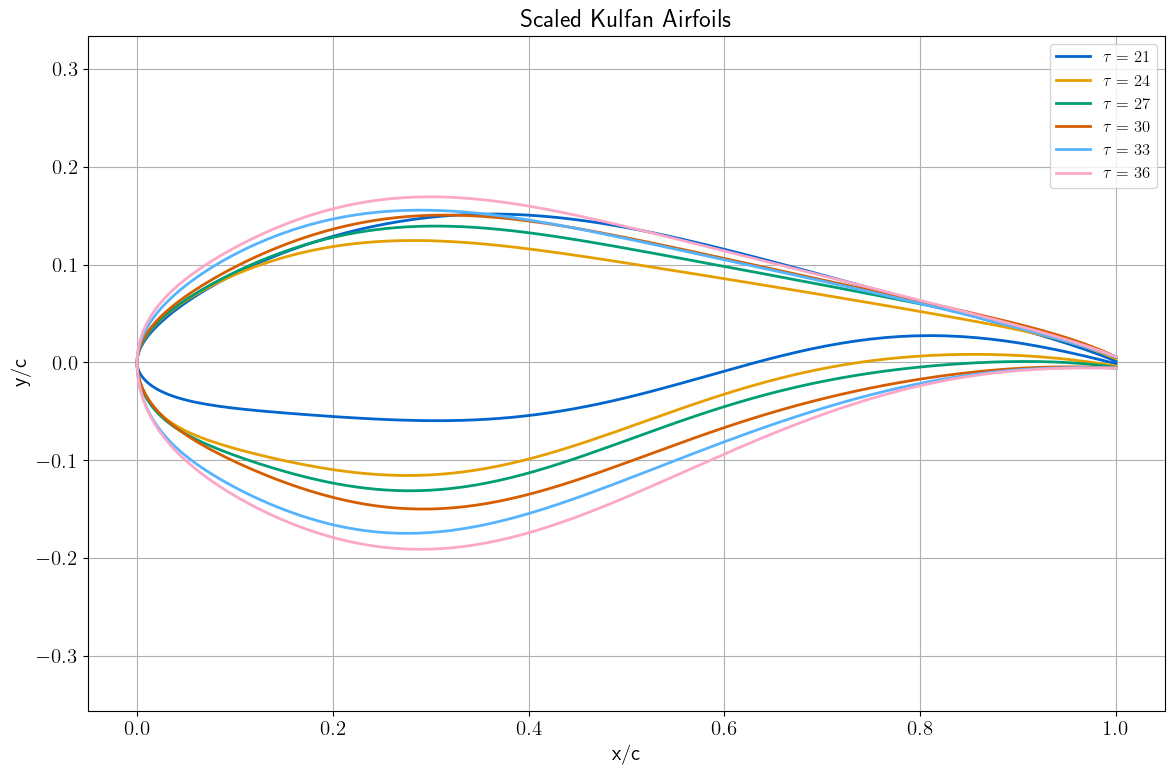

In [4]:
# from kulfan import Kulfan
from ada.geometry.airfoils.kulfan import Kulfan
from ada.analysis.apis.xfoil.run import run as run_xfoil
import os
import numpy as np
import json
# from xfoil_wrapper import run as run_xfoil

%matplotlib inline
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 15})
import matplotlib
# colors = ['#0065cc', '#e69f00', '#009e73', '#d55e00', '#56b4ff', '#fca7c7', '#ede13f', '#666666', '#000000']
colors = ['#0065cc', '#e69f00', '#009e73', '#d55e00', '#56b4ff', '#fca7c7', '#ede13f', '#000000']
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=colors)

PATH_TO_ADA = os.environ['PATH_TO_ADA']

import natsort

# combined = os.listdir('./oso-airfoils/postprocessing')
combined = os.listdir('.')
files     = list(sorted([f for f in combined if os.path.isfile(f) and '.dat' in f]))
folders = list(sorted([f for f in combined if not os.path.isfile(f) and f[0]!='.' and f[0]!='_']))

te_gap_lookup = {
    '15':  0.00196,
    '18':  0.00230,
    '21':  0.00262,
    '24':  0.00751,
    '27':  0.01012,
    '30':  0.01140,
    '33':  0.01140,
    '36':  0.01140,
}

# plot evolution of objective function zoomed
plt.figure(figsize=(12,8))
# plt.plot([b[2*Nk] for b in bcs])
# print(np.argmin([b[2*Nk] for b in bcs]))
# if take_best:
#     best_index = np.argmin([b[2*Nk] for b in bcs])
# else:
#     best_index = -1
# plt.title('Tau : %s'%(tau))
# plt.ylabel('Objective Function')
# plt.xlabel('Generation')
# plt.ylim([zoom_center-20,zoom_center+20])
# plt.xlim([0,itermax])
# plt.grid(1)
# plt.tight_layout()
# plt.savefig(folder + os.sep + 'Objective_Evolution_zoomed.png', dpi=250)
# plt.close()


for f in files:
    fnm = f.split('.')
    tau = fnm[0].split('_')[-1]
    if float(tau) >= 21:
        afl = Kulfan(TE_gap=te_gap_lookup[tau])
        afl.readFile(f)
        afl.scaleThickness(float(tau)/100.0)
        # print(afl.tau)
        plt.plot(afl.xcoordinates, afl.ycoordinates, label=r'$\tau = %s$'%tau, linewidth=2.0)

plt.axis('equal')
plt.xlabel('x/c')
plt.ylabel('y/c')
plt.title('Scaled Kulfan Airfoils')
plt.legend(loc='upper right', fontsize=12)
plt.grid(1)
plt.tight_layout()
# plt.savefig('kulfan_airfoils.png', dpi=250)
# plt.show()

{'ffa-w2-152': {'upperCoefficients': <Quantity([0.17046706 0.33438668 0.15476145 0.49129222 0.17236828 0.2962321
 0.18079263 0.0893167 ], 'dimensionless')>, 'lowerCoefficients': <Quantity([-0.14403581 -0.06194855 -0.19882893  0.01263156 -0.21452513 -0.02732511
 -0.13605042  0.01492792], 'dimensionless')>, 'TE_gap': 0.00188}, 'riso-a-15': {'upperCoefficients': <Quantity([0.19542248 0.4385377  0.08352634 0.66159665 0.02541908 0.32095343
 0.12465246 0.11836227], 'dimensionless')>, 'lowerCoefficients': <Quantity([-0.13928135 -0.01753147 -0.16014031  0.01432329 -0.07359144 -0.0155406
 -0.08035804 -0.04604944], 'dimensionless')>, 'TE_gap': 0.009644524}, 'riso-b-15': {'upperCoefficients': <Quantity([0.24531305 0.21994651 0.40331951 0.08076417 0.33022497 0.12332088
 0.30827469 0.16545387], 'dimensionless')>, 'lowerCoefficients': <Quantity([-0.2356706  -0.06474068 -0.16383772 -0.16611335 -0.05207295  0.01732643
  0.16465917  0.10002146], 'dimensionless')>, 'TE_gap': 0.004074484}, 'riso-p-15': {

4375


(-0.049999999999999996,
 1.0499999999999998,
 -0.11836570922960116,
 0.11324937083406783)

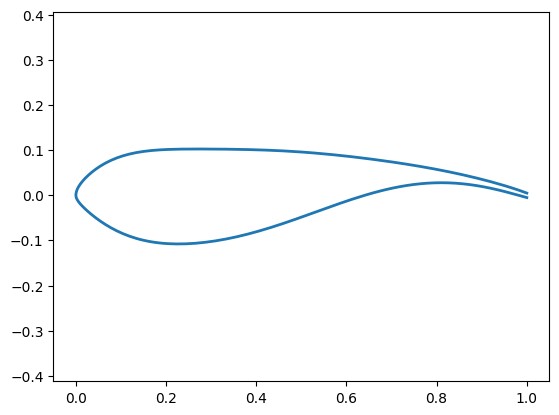

In [253]:
import copy
import random
import numpy as np
import math
from ada.geometry.airfoils.kulfan import Kulfan




def newMember(N_k):
    tau = 0.24
    afl = Kulfan(TE_gap = 0.01)

    counter = 0
    for i in range(0,10000):
        counter = i
        K = [random.uniform(-0.1,0.8) for j in range(0,int(N_k/2))]+[random.uniform(-0.8,0.5) for j in range(0,int(N_k/2))]
        
        Ku = K[0:int(len(K)/2)]
        Kl = K[int(len(K)/2):]
        afl.upperCoefficients = Ku
        afl.lowerCoefficients = Kl
        afl.scaleThickness(tau)
        tau_loc_u = afl.taumax_psi_upper
        tau_loc_l = afl.taumax_psi_lower
        hts = afl.getNormalizedHeight()
        leading_edge_radius_upper, leading_edge_radius_lower = afl.leadingEdgeRadius()

        delta_zeta_upper = afl.zetaUpper[1:] - afl.zetaUpper[0:-1]
        delta_psi = afl.psi[1:] - afl.psi[0:-1]
        first_derivative_approx = (delta_zeta_upper / delta_psi)
        delta_first_derivative = first_derivative_approx[1:] - first_derivative_approx[0:-1]
        delta_delta_psi = delta_psi[1:] - delta_psi[0:-1]
        second_derivative_approx = delta_first_derivative/delta_delta_psi
        positive_curvature = []
        for i in range(0, len(second_derivative_approx)):
            if second_derivative_approx[i] >0:
                positive_curvature.append(second_derivative_approx[i])
        curvature = sum(positive_curvature)

        delta_zeta_lower = afl.zetaLower[1:] - afl.zetaLower[0:-1]
        delta_psi = afl.psi[1:] - afl.psi[0:-1]
        first_derivative_approx_l = (delta_zeta_lower / delta_psi)
        delta_first_derivative_l = first_derivative_approx_l[1:] - first_derivative_approx_l[0:-1]
        delta_delta_psi = delta_psi[1:] - delta_psi[0:-1]
        second_derivative_approx_l = delta_first_derivative_l/delta_delta_psi
        sflips = 0
        sgn = second_derivative_approx_l[0]/abs(second_derivative_approx_l[0])
        for i in range(0, len(second_derivative_approx_l)):
            if second_derivative_approx_l[i]/abs(second_derivative_approx_l[i]) != sgn:
                sgn = second_derivative_approx_l[i]/abs(second_derivative_approx_l[i])
                sflips += 1

        K_candidate = afl.upperCoefficients.magnitude.tolist() + afl.lowerCoefficients.magnitude.tolist()

        conditions = [
            tau_loc_u >= 0.20, 
            tau_loc_u <= 0.40, 
            tau_loc_l >= 0.20, 
            tau_loc_l <= 0.40, 
            not any([math.isnan(rpv) for rpv in K_candidate]),
            max(abs(np.array(Ku)))<2.0, 
            max(abs(np.array(Kl)))<2.0, 
            not any(hts<0),
            leading_edge_radius_upper > 0.005,
            leading_edge_radius_lower > 0.005,
            Ku[0] > 0,
            Kl[0] < 0,
            curvature <= 200,
            sflips <= 1,
        ]

        if all(conditions):
            break

    print(counter)
    return K_candidate

k = 16
nm = newMember(k)

afl = Kulfan(TE_gap=0.01)
afl.upperCoefficients = nm[0:int(k/2)]
afl.lowerCoefficients = nm[int(k/2):k]
afl.scaleThickness(0.21)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(afl.xcoordinates, afl.ycoordinates, label='Kulfan Airfoil', linewidth=2.0)
plt.axis('equal')

2500000